In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [ ]:
store = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Rossman_dataset/store.csv")
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Rossman_dataset/train.csv')
train

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
data1 = train.merge(store,on = ["Store"],how="left")
data = data1.fillna(0).drop(["Promo2"],axis=1)
float_cols = ["CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear"]
data[float_cols] = data[float_cols].astype('int')
target = data["Sales"]
data = data.drop("Sales",axis=1)
data.StateHoliday[data.StateHoliday == '0'] = 0
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270,9,2008,0,0,0
1,2,5,2015-07-31,625,1,1,0,1,a,a,570,11,2007,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130,12,2006,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620,9,2009,0,0,0
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910,4,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,a,1,a,a,1900,6,2014,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,a,1,c,c,1880,4,2006,0,0,0
1017206,1113,2,2013-01-01,0,0,0,a,1,a,c,9260,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,a,1,a,c,870,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test1,Y_train,Y_test1 = train_test_split(data,target,test_size = 0.4,random_state = 25)       # shuffle=False   
X_test,X_val,Y_test,Y_val = train_test_split(X_test1,Y_test1,test_size= 0.5,random_state= 22)          
X_train = X_train.reset_index(drop=True)
X_test =  X_test.reset_index(drop=True)  
X_val  =  X_val.reset_index(drop=True)
X_train

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,496,1,2013-01-28,736,1,0,0,0,d,c,2780,6,2015,0,0,0
1,1037,2,2015-07-07,642,1,0,0,1,a,c,150,0,0,0,0,0
2,609,6,2013-07-27,289,1,0,0,0,a,a,2070,9,2007,0,0,0
3,77,4,2014-03-13,553,1,0,0,0,d,c,1090,8,2009,10,2014,"Jan,Apr,Jul,Oct"
4,763,1,2015-04-13,707,1,1,0,1,d,c,32240,3,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610320,1026,1,2015-04-06,0,0,0,b,1,c,a,450,6,2011,48,2012,"Mar,Jun,Sept,Dec"
610321,782,4,2013-12-26,0,0,0,c,1,c,c,5390,8,2003,1,2012,"Jan,Apr,Jul,Oct"
610322,1044,7,2015-07-26,0,0,0,0,0,c,a,240,4,2015,13,2010,"Jan,Apr,Jul,Oct"
610323,116,1,2015-05-11,839,1,0,0,0,a,a,680,4,2013,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
Y_train_array = Y_train.values.reshape(610325,1)
Y_train_array[Y_train_array>17000]=0
#Y_train_array[Y_train_array==0]=1 
scaler = StandardScaler()
scaler.fit(Y_train_array)
Y_train_list = scaler.transform(Y_train_array)

Y_val_array = Y_val.values.reshape(203442,1)
Y_val_array[Y_val_array>17000]=0
#Y_val_array[Y_val_array==0]=1
scaler1 = StandardScaler()
scaler1.fit(Y_val_array)
Y_val_list = scaler1.transform(Y_val_array)

In [ ]:
columns = data.columns
contineous_columns = ["Customers","CompetitionDistance"]
categorical_columns = np.delete(columns,[3,10]).to_list()

In [ ]:
X_train_input = []
X_test_input  = []
X_val_input   = []
#     for o in object_columns:
#     date = (X_train[o]).unique()   
#     ty = {} 
#     for x in range(len(date)): 
#         ty[date[x]]= x 
#     X_train_input.append((X_train[o]).map(ty).values)
#     X_test_input.append((X_test[o]).map(ty).values)
#     X_val_input.append((X_val[o]).map(ty).values)
for o in categorical_columns:
    date = (data[o]).unique()   
    ty = {} 
    for x in range(len(date)): 
        ty[date[x]]= x 
    X_train_input.append((X_train[o]).map(ty).values)
    X_test_input.append((X_test[o]).map(ty).values)
    X_val_input.append((X_val[o]).map(ty).values)

for x in contineous_columns:
  X_train_input.append((X_train[x]).values)
  X_test_input.append((X_test[x]).values)
  X_val_input.append((X_val[x]).values)

In [ ]:
X_train_input

[array([ 495, 1036,  608, ..., 1043,  115,  838]),
 array([4, 3, 6, ..., 5, 4, 5]),
 array([914,  24, 734, ...,   5,  81,  26]),
 array([0, 0, 0, ..., 1, 0, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([2, 1, 1, ..., 0, 1, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([ 8,  6,  0, ...,  3,  3, 10]),
 array([4, 9, 1, ..., 4, 5, 4]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([736, 642, 289, ...,   0, 839,   0]),
 array([2780,  150, 2070, ...,  240,  680,  240])]

In [ ]:
import tensorflow.keras.backend as K

from keras import backend as K
def rmspe(y_true, y_pred):
    pct_var = ((y_true - y_pred)-100) / y_true
    sum = K.sqrt(K.mean(K.square( pct_var)))
          ## K.clip(K.abs(y_true),K.epsilon(),None) ), axis=-1) )
    return sum*100

def root_mean_squared_error(y_true, y_pred):
        sum = K.mean((K.abs((y_true - y_pred)-100) / y_true))
        return sum*100  

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.layers import Input,Embedding
from tensorflow.keras.layers import Dense,Reshape,Concatenate,concatenate
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

In [ ]:
input_list = []
output_list = []


for x in categorical_columns:
    list1 = data[x].unique().tolist()
    no_of_catagories = len(list1)+1
    
    
    embedding_layer_dimention = int(min(np.ceil((no_of_catagories)/2), 50 ))
    catagory_name = x.replace(" ","")+"_Embedding"
    
    input_layer = Input(shape=(1,))
    embedding_layer = Embedding(no_of_catagories,embedding_layer_dimention,name=catagory_name)(input_layer)
    output_embedding_layer = Reshape(target_shape=(embedding_layer_dimention,))(embedding_layer)
    input_list.append(input_layer)
    output_list.append(output_embedding_layer)
    

input_layer = Input(shape=(1,))                  # len(contineous_columns)
output_layer = Dense(128)(input_layer)
input_list.append(input_layer)
output_list.append(output_layer) 


output = Concatenate()(output_list)
output = Dense(2000, kernel_initializer="uniform")(output)
output = Activation('relu')(output)
#output= Dropout(0.4)(output)
output = Dense(1000, kernel_initializer="uniform")(output)
output = Activation('relu')(output)
#output= Dropout(0.4)(output)
output = Dense(512, kernel_initializer="uniform")(output)
output = Activation('relu')(output)
#output= Dropout(0.3)(output)
output = Dense(1)(output)  # ,activation='sigmoid'



model = Model(inputs = input_list,outputs = output)
Adam = optimizers.Adam(lr= 0.01)
model.compile(loss= "mean_absolute_error", optimizer=Adam, metrics=["mean_absolute_error"])   #  metrics=[root_mean_squared_error]

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler



checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab_Notebooks/Rossman_dataset/',moniter='loss',save_best_only=True,save_weights_only=True)

class mynewCallback(Callback):
  def on_epoch_end(self,epoch,logs):
    if logs.get('loss')<600:
      print('The loss was low!!')
      self.model.stop_training=True

In [ ]:
final = model.fit(X_train_input,Y_train_array,validation_data=(X_val_input,Y_val_array),callbacks=[checkpoint],epochs=100,batch_size=8000,verbose=1)

Epoch 1/100
77/77 [==============================] - 4s 46ms/step - loss: 344.0404 - mean_absolute_error: 344.0404 - val_loss: 341.1885 - val_mean_absolute_error: 341.1885
Epoch 2/100
77/77 [==============================] - 3s 43ms/step - loss: 477.9283 - mean_absolute_error: 477.9283 - val_loss: 346.7878 - val_mean_absolute_error: 346.7878
Epoch 3/100
77/77 [==============================] - 3s 43ms/step - loss: 344.5268 - mean_absolute_error: 344.5268 - val_loss: 342.4416 - val_mean_absolute_error: 342.4416
Epoch 4/100
77/77 [==============================] - 4s 46ms/step - loss: 340.6129 - mean_absolute_error: 340.6129 - val_loss: 339.9325 - val_mean_absolute_error: 339.9325
Epoch 5/100
77/77 [==============================] - 3s 44ms/step - loss: 338.9786 - mean_absolute_error: 338.9786 - val_loss: 348.5875 - val_mean_absolute_error: 348.5875
Epoch 6/100
77/77 [==============================] - 3s 44ms/step - loss: 396.4878 - mean_absolute_error: 396.4878 - val_loss: 354.8667 - va

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pylab as plt

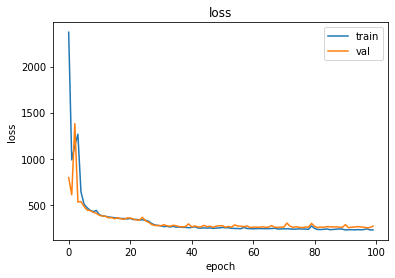

In [ ]:
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(final.history['root_mean_squared_error'])
plt.plot(final.history['val_root_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
ty = model.predict(X_test_input)

In [ ]:
ty

array([[2.5026113e+03],
       [4.2580557e+03],
       [1.4727598e+04],
       ...,
       [7.4014307e+03],
       [1.3112426e-03],
       [3.9832168e+03]], dtype=float32)

In [ ]:
yt = []
for x,y in zip(ty,Y_test.values):
  rt = abs(x-y)
  yt.append(rt)
sum(yt)/len(ty)

#Y_val_array[Y_val_array==0]

array([437.0171351])

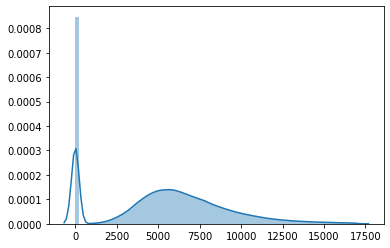

In [ ]:
import seaborn as sb
%matplotlib inline
sb.distplot(Y_train_array,bins=80)

In [ ]:
from tensorflow.keras.models import Model,model_from_json

model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("/content/drive/My Drive/Colab Notebooks/model.h5")
print("Saved model to disk")

model.save("/content/drive/My Drive/Colab Notebooks/complete_model.json")

Saved model to disk


In [ ]:
# ((Q3-Q1)*g)+Q3 = upper limit for outliers   ; g can be 1.5 or 2.2
# Q1-((Q3-Q1)*g) = lower limit for outliers   ; g can be 1.5 or 2.2

In [ ]:
W = np.percentile(Y_train_array,75)
Q = np.percentile(Y_train_array,25)
((W-Q)*2.2)+W   # Q-((W-Q)*1.5)       

array([-1.54735564])